In [1]:
#import standard libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
import os
for dirname, _, filenames in os.walk('../input/sign-language-mnist'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# the following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# you might want to remove those credentials before you share the notebook.

client_538b0f9b80ac4ab19c75e3e5ff33b854 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='F_SiVmCTSzfU7b-FwIXrCnZOhx-CcdcSyV3bqP0duIeh',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_538b0f9b80ac4ab19c75e3e5ff33b854.get_object(Bucket='ds420classification-donotdelete-pr-pibfvvrlv0nrfi',Key='sign_mnist_train.csv')['Body']

# add missing __iter__ method, so pandas accepts body as file-like object

if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

train = pd.read_csv(body)

In [4]:
body = client_538b0f9b80ac4ab19c75e3e5ff33b854.get_object(Bucket='ds420classification-donotdelete-pr-pibfvvrlv0nrfi',Key='sign_mnist_test.csv')['Body']

# add missing __iter__ method, so pandas accepts body as file-like object

if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test = pd.read_csv(body)

In [5]:
#Create training and test set
#train = pd.read_csv("sign_mnist_train.csv")
#test = pd.read_csv("sign_mnist_test.csv")

In [6]:
#There seems to be 7,172 in the test set, and 27,455 rows in the training set
print(test.shape)
print(train.shape)

(7172, 785)
(27455, 785)


In [7]:
#All seem to be integer data types, this is great!
test.dtypes

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object

In [8]:
#This is interesting to look at but does not mean too much given they are just describing the pixels of the image. Model will read these when classifying though
test.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [9]:
#There looks to be no missing values
test.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [10]:
#There is no duplicated values!
test.duplicated().sum()

0

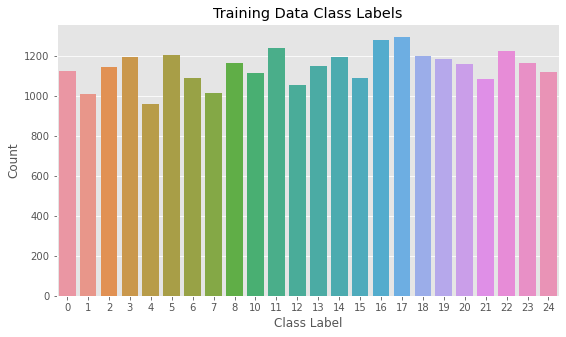

In [11]:
# create ggplot object and plot the count of each class label in the training set
plt.style.use("ggplot")
plt.figure(figsize =(9,5))
sns.countplot(x=train['label'],data =train)
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.title("Training Data Class Labels")
plt.show()

In [12]:
#Seperate test and traing datasets into X_test, y_test, X_train, and y_train
X_test = test.loc[:, test.columns != 'label']
y_test = test['label']
X_train = train.loc[:, test.columns != 'label']
y_train = train['label']

In [13]:
#Set up Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=6, random_state=42)

In [14]:
#Predict the label values
y_pred = tree_clf.predict(X_test)

In [15]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import precision_score, recall_score
print("precision:",precision_score(y_test, y_pred, average='macro'))

print("recall:",recall_score(y_test, y_pred, average='macro'))

Accuracy: 0.41885108756274403
precision: 0.40733034905190557
recall: 0.41177944871293776


In [16]:
'''
Accuracy is 41%, this is not very good. We should look to try PCA to see
if we can better predict the class of the images.

'''

'\nAccuracy is 41%, this is not very good. We should look to try PCA to see\nif we can better predict the class of the images.\n\n'

In [17]:
#Set up PCA for training set
from sklearn.decomposition import PCA
df = pd.concat([train, test], axis=0)
y = df['label']

pca = PCA(n_components = 7)
df_pca = pca.fit_transform(df)


In [18]:
#Start training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((27701, 7), (6926, 7), (27701,), (6926,))

In [19]:
#Set up Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(min_samples_leaf=2, random_state=42)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=2, random_state=42)

In [20]:
#Predict the label values
y_pred_tree = tree_clf.predict(x_test)

In [21]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))

from sklearn.metrics import precision_score, recall_score
print("precision:",precision_score(y_test, y_pred_tree, average='macro'))

print("recall:",recall_score(y_test, y_pred_tree, average='macro'))

Accuracy: 0.8520069304071615
precision: 0.8514277040831993
recall: 0.8517810173823054


In [22]:
'''
PCA with 7 components helped get the accuracy up to 80%. This is a good improvement! Much better than the original 
accuracy. We can now interpret the correct letter of the sign language with 80% certainty.

Both of our current used a decision tree classifier, we will now try out an SGD Classifer and a KNN Classifier

'''

'\nPCA with 7 components helped get the accuracy up to 80%. This is a good improvement! Much better than the original \naccuracy. We can now interpret the correct letter of the sign language with 80% certainty.\n\nBoth of our current used a decision tree classifier, we will now try out an SGD Classifer and a KNN Classifier\n\n'

In [23]:
#Create SGD Classifier (Stochastic Gradient Descent) and train the model
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(x_train, y_train)

SGDClassifier(max_iter=5, random_state=42, tol=-inf)

In [24]:
#Predict the label values
y_pred = sgd_clf.predict(x_test)

In [25]:
# Model Accuracy, Precision, and Recall
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import precision_score, recall_score
print("precision:",precision_score(y_test, y_pred, average='macro'))

print("recall:",recall_score(y_test, y_pred, average='macro'))

Accuracy: 0.06569448455096737
precision: 0.07020730445464494
recall: 0.06505870218326117


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
'''

Wow! This is certainly a model to forget about. Accuracy, precision, and recall is all below 5%.. This is actually incredible to see scores this bad. Let's 
move on to KNN.. Overall, this was a good model to try out but this type of classification should not be used on this data set.

'''

"\n\nWow! This is certainly a model to forget about. Accuracy, precision, and recall is all below 5%.. This is actually incredible to see scores this bad. Let's \nmove on to KNN.. Overall, this was a good model to try out but this type of classification should not be used on this data set.\n\n"

In [27]:
#Create and Fit knn model

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

In [28]:
#Predict the label values
y_pred = knn_clf.predict(x_test)

In [29]:
# Model Accuracy, Precision, and Recall
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import precision_score, recall_score
print("precision:",precision_score(y_test, y_pred, average='macro'))

print("recall:",recall_score(y_test, y_pred, average='macro'))

Accuracy: 0.839589950909616
precision: 0.8410970552762483
recall: 0.8397596719210773


In [30]:
'''

This was a pretty good accuracy, recall and precision. We have an accuracy that was a little less accurate than the decision tree classifier, but still
a good predictor of which letter is being shown through the images. Through analyzing the recall, we can see that this model correctly identifies about 85% of the 
signs. Also, through the precision we can see that when our model predicts a given sign, it is correct 84% of the time.

'''

'\n\nThis was a pretty good accuracy, recall and precision. We have an accuracy that was a little less accurate than the decision tree classifier, but still\na good predictor of which letter is being shown through the images. Through analyzing the recall, we can see that this model correctly identifies about 85% of the \nsigns. Also, through the precision we can see that when our model predicts a given sign, it is correct 84% of the time.\n\n'

In [31]:
#Create confusion matrix on our knn model

#Provide evaluation using confusion matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_tree)
print(cm)

[[270   1   0   1  10   1   0   0   3   2   0   8   3   0   0   1   0   2
    0   0   0   2   0   0]
 [  1 266   0   4   0   1   0   0   7   1   0   0   4   3   0   0   0   2
    1   2   1   0   0   0]
 [  0   0 319   0   0   5   2   2   0   0   1   0   0   1   0   0   0   0
    2   0   0   0   1   0]
 [  1   6   0 250   0   0   1   1   0   2   1   5   0   0   4   1   3   1
    4   4   2   2   7   3]
 [  8   0   1   1 244   1   0   0   0   0   0   9   7   0   0   4   0  10
    0   0   0   0   0   0]
 [  1   1   4   0   1 242   3   5   0   3   1   1   0   2   0   0   1   1
    2   7   3   3   0   0]
 [  0   0   4   1   0   2 258   2   0   0   2   0   0   0   0   0   0   0
    5   1   1   0   2   2]
 [  0   0   1   3   1   1   8 269   0   1   1   0   0   0   2   0   0   0
    2   1   1   0   0   0]
 [  5   8   1   1   1   3   0   0 240   2   0   1   1   0   0   2   4   3
    0   0   0   1   0   2]
 [  0   1   0   4   0   0   1   0   4 279   5   0   0   0   1   0   2   0
    0   6   7   4

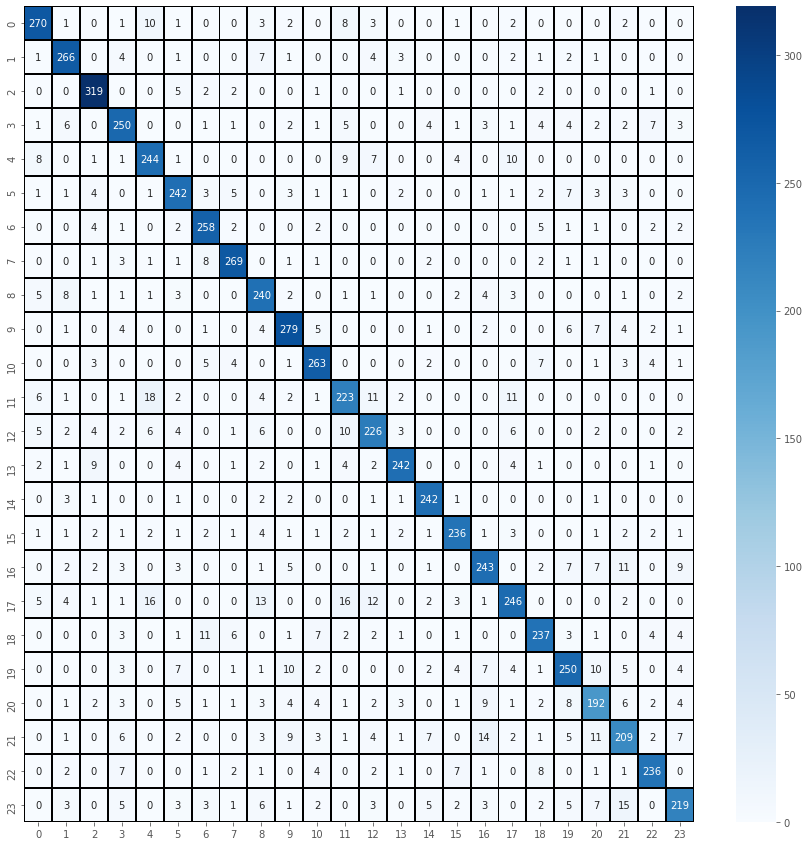

In [32]:
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       304
           1       0.88      0.91      0.89       293
           2       0.90      0.96      0.93       333
           3       0.83      0.84      0.84       298
           4       0.82      0.86      0.84       285
           5       0.84      0.86      0.85       281
           6       0.87      0.92      0.90       280
           7       0.91      0.92      0.91       291
           8       0.80      0.87      0.83       275
          10       0.86      0.88      0.87       317
          11       0.88      0.89      0.89       294
          12       0.79      0.79      0.79       282
          13       0.80      0.81      0.81       279
          14       0.92      0.88      0.90       274
          15       0.90      0.95      0.92       255
          16       0.90      0.88      0.89       269
          17       0.84      0.82      0.83       297
          18       0.83    